In [1]:
import os, sys
import glob
from tqdm.auto import tqdm
import random
import shutil
import pandas as pd
import seaborn as sns
sns.set()

import numpy as np
random.seed(43)
np.random.seed(43)

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

In [2]:
hereon_color_array = np.array([
    [230, 0, 70],
    [0,145,160],
    [0, 170, 230],
    [250,180,35],
    [0,70,125],
    [175, 25, 60],
    [170, 200 ,70],
    [250,115,80],
    [140, 90, 180],
])
hereon_color_array = hereon_color_array / 255
hereon_cmap = ListedColormap(hereon_color_array)

sns.set_palette(hereon_color_array)

In [3]:
# data_dir = "/p/project/hai_emulator/plankton_data"
data_dir = "/gpfs/work/machnitz/plankton_dataset"
multi_label_data = os.path.join(data_dir, "human_error2")
multi_label_data_csv = os.path.join(multi_label_data, "human_error2.csv")
multi_label_data_new = os.path.join(data_dir, "new_data/multi_label")

In [4]:
df = pd.read_csv(multi_label_data_csv, index_col=0)
df = df.sample(frac=1).reset_index(drop=True)
df["sorted_by_Saskia"] = df["sorted_by_Saskia"].astype("category")
df["sorted_by_Elisa"] = df["sorted_by_Elisa"].astype("category")
df["sorted_by_Marie"] = df["sorted_by_Marie"].astype("category")

In [5]:
train_df = df.iloc[:700]
val_df = df.iloc[700:800]
test_df = df.iloc[800:]

In [6]:
alpha = 1

color1 = np.array([230, 0, 70]) / 255
color2 = np.array([0,145,160]) / 255
color3 = np.array([0,70,125]) / 255

colors = [color1, color2, color3]
handles = []
for i, color in enumerate(colors):
    handles.append(mpatches.Patch(color=color, label=f'Scientist {i}', alpha=alpha))

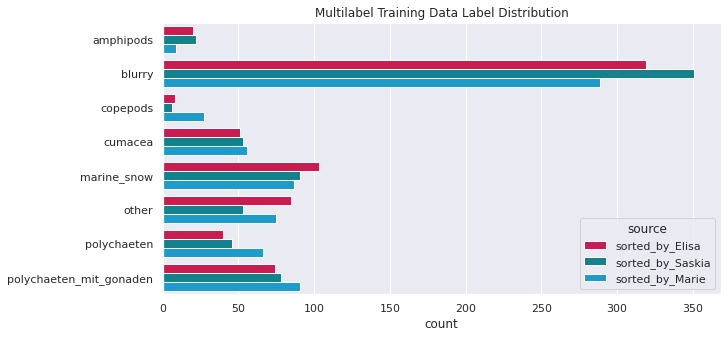

In [7]:
train_df_melted = pd.melt(train_df.drop(columns="file"), var_name="source", value_name="value_numbers").sort_values(by="value_numbers")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(y="value_numbers", data=train_df_melted, hue="source")
ax.set_title("Multilabel Training Data Label Distribution")
ax.set_ylabel("")
plt.show()

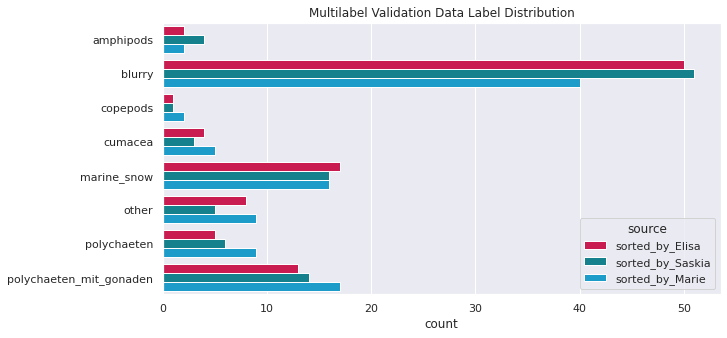

In [8]:
val_df_melted = pd.melt(val_df.drop(columns="file"), var_name="source", value_name="value_numbers").sort_values(by="value_numbers")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(y="value_numbers", data=val_df_melted, hue="source")
ax.set_title("Multilabel Validation Data Label Distribution")
ax.set_ylabel("")
plt.show()

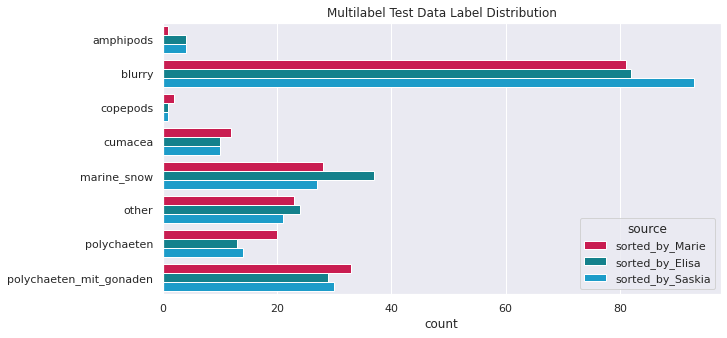

In [9]:
test_df_melted = pd.melt(test_df.drop(columns="file"), var_name="source", value_name="value_numbers").sort_values(by="value_numbers")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(y="value_numbers", data=test_df_melted, hue="source")
ax.set_title("Multilabel Test Data Label Distribution")
ax.set_ylabel("")
plt.show()

In [10]:
train_df.to_csv(os.path.join(multi_label_data_new, "multi_label_train.csv"))
val_df.to_csv(os.path.join(multi_label_data_new, "multi_label_val.csv"))
test_df.to_csv(os.path.join(multi_label_data_new, "multi_label_test.csv"))

In [ ]:
dfs = [train_df, val_df, test_df]
set_names = ["train", "val", "test"]

for set_df, set_name in tqdm(zip(dfs, set_names),  position=0):
    for idx, row in tqdm(set_df.iterrows(), position=1, leave=False):
        source_path = os.path.join(multi_label_data, "rois", row["file"])
        dest_path = os.path.join(multi_label_data_new, set_name, row["file"])
        shutil.copy2(source_path, dest_path)